## Food Recommendation System
###### We will be going to build a Food recommendation system based on given datasets.
The link for datasets is given below :
https://docs.google.com/spreadsheets/d/1TEKkPm_i_SFEsp3b3l45PQz4xMkTAbE0RmXRA00Kzyo/edit?usp=sharing

##### There are various things in a Life Cycle of Data Science :
1. Data Analysis
2. Data Visualization
3. Feature Engineering
4. Feature Scaling
5. Model Selection
6. Model Deployment

# Data Analysis

Let's import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
sns.set_style('whitegrid')
import scipy.stats as ss

In [2]:
## Now read the data
data = pd.read_csv('Food Recomediation system.csv')

In [3]:
## Let's view head of datasets
data.head()

,Name,Gender,Age,State of Residence,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer?,What would you prefer?.1,What would you prefer?.2,What would you prefer?.3,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Aaron Page,Male,19,Iowa,True,Tea,Shakes,Waffles,Wraps,Falooda,NaN,NaN,NaN,NaN,NaN
1,Adam Hernandez,Male,23,Ohio,True,None,None,None,Sandwiches,Rabdi,NaN,NaN,NaN,NaN,NaN
2,Adam Young,Male,21,California,True,Tea,Shakes,Pan Cakes,Sandwiches,Falooda,NaN,NaN,NaN,NaN,NaN
3,Aimee Castaneda,Male,22,Michigan,False,Tea,Hot Chocolate,Pan Cakes,Sandwiches,Rabdi,NaN,NaN,NaN,NaN,NaN
4,Alejandra Hernandez,Female,20,Washington,True,Tea,Hot Chocolate,None,Sandwiches,Rabdi,NaN,NaN,NaN,NaN,NaN


In [4]:
## Let's view shape of datasets
data.shape

(300, 15)

In [5]:
## Let's dig some information about datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             300 non-null    object 
 1   Gender                           300 non-null    object 
 2   Age                              300 non-null    int64  
 3   State of Residence               300 non-null    object 
 4   Do you eat Eggs/ Non-Veg?        300 non-null    bool   
 5   What's your favourite beverage?  300 non-null    object 
 6   What would you prefer?           300 non-null    object 
 7   What would you prefer?.1         300 non-null    object 
 8   What would you prefer?.2         300 non-null    object 
 9   What would you prefer?.3         300 non-null    object 
 10  Unnamed: 10                      0 non-null      float64
 11  Unnamed: 11                      0 non-null      float64
 12  Unnamed: 12           

###### We conclude that 4 columns are unneccesary which may appears due to converting into csv file.

In [6]:
## We have to drop unncessary column which appears when we convert this data into a csv file
data.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],inplace=True,axis=1)

In [7]:
## Let's see some data values.
data.head()

,Name,Gender,Age,State of Residence,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer?,What would you prefer?.1,What would you prefer?.2,What would you prefer?.3
0,Aaron Page,Male,19,Iowa,True,Tea,Shakes,Waffles,Wraps,Falooda
1,Adam Hernandez,Male,23,Ohio,True,None,None,None,Sandwiches,Rabdi
2,Adam Young,Male,21,California,True,Tea,Shakes,Pan Cakes,Sandwiches,Falooda
3,Aimee Castaneda,Male,22,Michigan,False,Tea,Hot Chocolate,Pan Cakes,Sandwiches,Rabdi
4,Alejandra Hernandez,Female,20,Washington,True,Tea,Hot Chocolate,None,Sandwiches,Rabdi


###### Now, We will be converting the Gender column into float dtypes by using bits values.

In [8]:
data['Gender'] = np.where(data['Gender']=='Male',1,0)

Here, 1 indicates Male and 0 indicates Female.

# Data Visualization

In [9]:
## Let's take all target values which we have to predict in a list
target = ['''What's your favourite beverage?''','What would you prefer?','What would you prefer?.1','What would you prefer?.2','What would you prefer?.3']

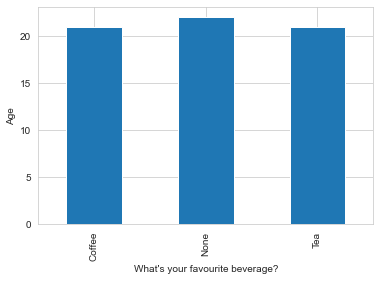

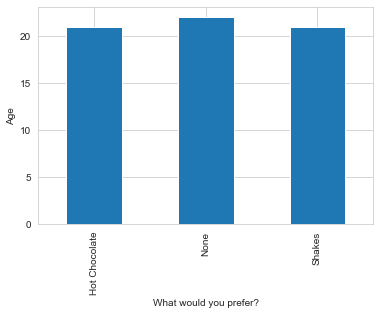

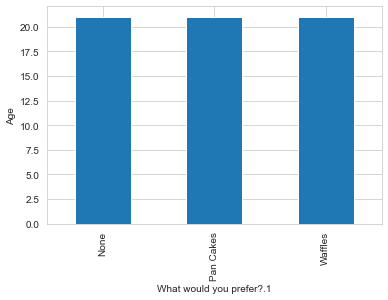

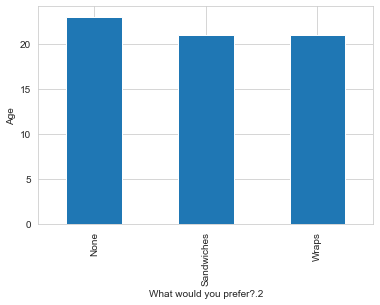

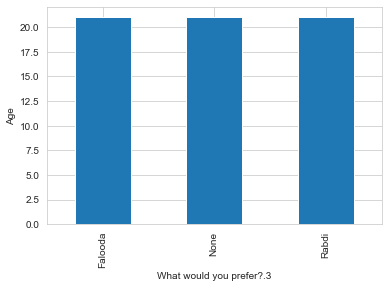

In [10]:
## Let's plot some graph and try to understand its outcome
for x in target :
    dataset = data.copy()
    dataset.groupby(x)['Age'].median().plot.bar()
    plt.xlabel(x)
    plt.ylabel('Age')
    plt.show()

From this graph we conclude that the person having age greater than 20 are confused between the given options.

Let's count how many feature they have in every taregt values.

In [11]:
data["What's your favourite beverage?"].value_counts()

Tea       154
Coffee    117
None       29
Name: What's your favourite beverage?, dtype: int64

We Conclude that many peoples prefer Tea over Coffee.

In [12]:
data['What would you prefer?'].value_counts()

Shakes           199
Hot Chocolate     78
None              23
Name: What would you prefer?, dtype: int64

We conclude that many peoples prefer Shakes over Hot Chocolate.

In [13]:
data['What would you prefer?.1'].value_counts()

Waffles      143
Pan Cakes     84
None          73
Name: What would you prefer?.1, dtype: int64

We conclude that many peoples prefer Waffles over Pan Cakes.

In [14]:
data['What would you prefer?.2'].value_counts()

Sandwiches    189
Wraps         100
None           11
Name: What would you prefer?.2, dtype: int64

We Conclude that many peoples prefer Sandwiches over Wraps.

In [15]:
data['What would you prefer?.3'].value_counts()

Rabdi      186
Falooda     71
None        43
Name: What would you prefer?.3, dtype: int64

We Conclude that many peoples prefer Rabdi over Falooda.

# Feature Engineering

##### We conclude from graph for every target values there is None values also so we have to consider this None value also during recommendations. So, I think that we should recommend those features which are prefered by more people to those people who choses None as their preference. For this We can increase our food supply.

In [16]:
## Let's convert "Do you eat Eggs/ Non-Veg?" columns values into bits values.
data['Do you eat Eggs/ Non-Veg?'] = np.where(data['Do you eat Eggs/ Non-Veg?'],1,0)

In [17]:
## ## Let's convert "What's your favourite beverage?" columns values into bits values.
data["What's your favourite beverage?"] = np.where(data["What's your favourite beverage?"]=='Coffee',1,0)

In [18]:
## Let's convert "What would you prefer?" columns values into bits values.
data['What would you prefer?'] = np.where(data['What would you prefer?']=='Hot Chocolate',1,0)

In [19]:
##  Let's convert "What would you prefer?.1" columns values into bits values.
data['What would you prefer?.1'] = np.where(data['What would you prefer?.1']=='Pan Cakes',1,0)


In [20]:
##  Let's convert "What would you prefer?.2" columns values into bits values.
data['What would you prefer?.2'] = np.where(data['What would you prefer?.2']=='Wraps',1,0)


In [21]:
##  Let's convert "What would you prefer?.3" columns values into bits values.
data['What would you prefer?.3'] = np.where(data['What would you prefer?.3']=='Falooda',1,0)

In [22]:
## Let's see head of data
data.head()

,Name,Gender,Age,State of Residence,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer?,What would you prefer?.1,What would you prefer?.2,What would you prefer?.3
0,Aaron Page,1,19,Iowa,1,0,0,0,1,1
1,Adam Hernandez,1,23,Ohio,1,0,0,0,0,0
2,Adam Young,1,21,California,1,0,0,1,0,1
3,Aimee Castaneda,1,22,Michigan,0,0,1,1,0,0
4,Alejandra Hernandez,0,20,Washington,1,0,1,0,0,0


###### Now, We have to deal with State Columns. Let's view how many states do we have in our data.

In [23]:
## Let's dig into state data
data['State of Residence'].value_counts()

California     74
Michigan       61
Iowa           58
Texas          43
Ohio           34
Washington     30
Name: State of Residence, dtype: int64

###### We have see that there is only 6 states feature on States columns. so, we can use dummy varaiable  

In [24]:
State = pd.get_dummies(data['State of Residence'],drop_first=True) 

We dropped this Feature "California" using drop_first because we can present California using 5 others columns.So, there is no need of keeping it.

In [25]:
State

,Iowa,Michigan,Ohio,Texas,Washington
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
295,1,0,0,0,0
296,0,0,0,0,0
297,0,1,0,0,0
298,0,1,0,0,0


In [26]:
## Now, We are merging this dataframe with our original data.
data = pd.concat([data,State],axis=1)

In [27]:
## After Merging let's see some data.
data.head()

,Name,Gender,Age,State of Residence,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer?,What would you prefer?.1,What would you prefer?.2,What would you prefer?.3,Iowa,Michigan,Ohio,Texas,Washington
0,Aaron Page,1,19,Iowa,1,0,0,0,1,1,1,0,0,0,0
1,Adam Hernandez,1,23,Ohio,1,0,0,0,0,0,0,0,1,0,0
2,Adam Young,1,21,California,1,0,0,1,0,1,0,0,0,0,0
3,Aimee Castaneda,1,22,Michigan,0,0,1,1,0,0,0,1,0,0,0
4,Alejandra Hernandez,0,20,Washington,1,0,1,0,0,0,0,0,0,0,1


Now, We don't need "State Of Residence" and "Name" Feature so we are going to drop this column from our dataset.

In [28]:
data.drop(columns=['State of Residence','Name'],axis=1,inplace=True)

Now, Let's rename our target names into some useful and logical names.

In [29]:
data.rename(columns={'What would you prefer?':'What would you prefer Hot Chocolate / Shakes'},inplace=True)
data.rename(columns={'What would you prefer?.1':'What would you prefer Waffles / Pan Cakes'},inplace=True)
data.rename(columns={'What would you prefer?.2':'What would you prefer Wraps / Sandwiches'},inplace=True)
data.rename(columns={'What would you prefer?.3':'What would you prefer Falooda / Rabdi'},inplace=True)

In [30]:
## Now, Let's see head of data
data.head()

,Gender,Age,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer Hot Chocolate / Shakes,What would you prefer Waffles / Pan Cakes,What would you prefer Wraps / Sandwiches,What would you prefer Falooda / Rabdi,Iowa,Michigan,Ohio,Texas,Washington
0,1,19,1,0,0,0,1,1,1,0,0,0,0
1,1,23,1,0,0,0,0,0,0,0,1,0,0
2,1,21,1,0,0,1,0,1,0,0,0,0,0
3,1,22,0,0,1,1,0,0,0,1,0,0,0
4,0,20,1,0,1,0,0,0,0,0,0,0,1


###### Now, Let's find out correlation between these datasets using graphs .

<AxesSubplot:>

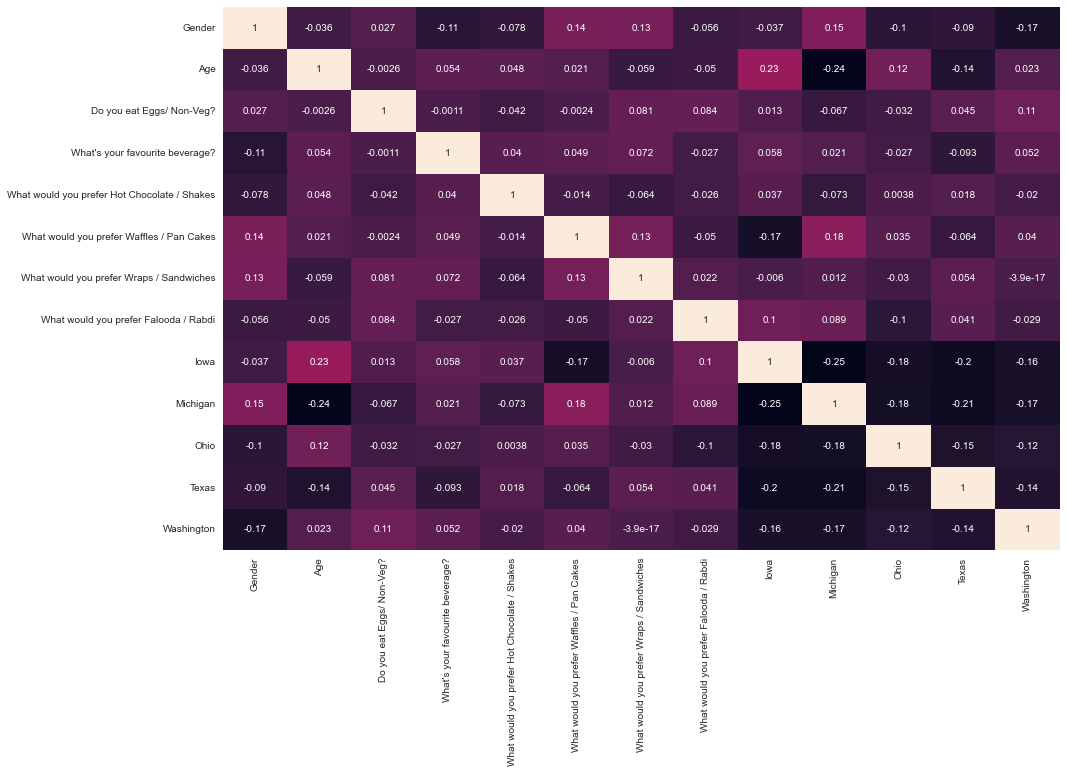

In [31]:
## Let's visualize using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cbar=False,annot=True)

In [32]:
## Let's correlate this data
data.corr()

,Gender,Age,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer Hot Chocolate / Shakes,What would you prefer Waffles / Pan Cakes,What would you prefer Wraps / Sandwiches,What would you prefer Falooda / Rabdi,Iowa,Michigan,Ohio,Texas,Washington
Gender,1.000000,-0.036395,0.026958,-0.112193,-0.077893,0.142911,1.325825e-01,-0.056204,-0.037280,0.154598,-0.104276,-0.089577,-1.666667e-01
Age,-0.036395,1.000000,-0.002631,0.053531,0.047603,0.021353,-5.895073e-02,-0.049898,0.225757,-0.237394,0.115916,-0.135432,2.336856e-02
Do you eat Eggs/ Non-Veg?,0.026958,-0.002631,1.000000,-0.001105,-0.041792,-0.002402,8.101487e-02,0.083933,0.012743,-0.066534,-0.031749,0.045134,1.078328e-01
What's your favourite beverage?,-0.112193,0.053531,-0.001105,1.000000,0.040197,0.049315,7.248661e-02,-0.027173,0.058492,0.020546,-0.027164,-0.093029,5.239479e-02
What would you prefer Hot Chocolate / Shakes,-0.077893,0.047603,-0.041792,0.040197,1.000000,-0.014217,-6.448259e-02,-0.026104,0.036947,-0.072882,0.003836,0.017783,-2.026492e-02
What would you prefer Waffles / Pan Cakes,0.142911,0.021353,-0.002402,0.049315,-0.014217,1.000000,1.259882e-01,-0.050304,-0.173702,0.182980,0.034661,-0.064406,3.959426e-02
What would you prefer Wraps / Sandwiches,0.132583,-0.058951,0.081015,0.072487,-0.064483,0.125988,1.000000e+00,0.022182,-0.005968,0.011713,-0.029742,0.053811,-3.925231e-17
What would you prefer Falooda / Rabdi,-0.056204,-0.049898,0.083933,-0.027173,-0.026104,-0.050304,2.218187e-02,1.000000,0.104722,0.088919,-0.100113,0.040807,-2.875574e-02
Iowa,-0.037280,0.225757,0.012743,0.058492,0.036947,-0.173702,-5.968474e-03,0.104722,1.000000,-0.247327,-0.175027,-0.200251,-1.631868e-01
Michigan,0.154598,-0.237394,-0.066534,0.020546,-0.072882,0.182980,1.171254e-02,0.088919,-0.247327,1.000000,-0.180619,-0.206649,-1.684010e-01


###### From the heatmap we conclude that States actually don't correlated with our datasets. So , I think we can drop those values.

In [33]:
data.drop(['Iowa','Ohio','Texas','Washington','Michigan'],axis=1,inplace=True)

In [34]:
## Now, Let's see some data
data.head()

,Gender,Age,Do you eat Eggs/ Non-Veg?,What's your favourite beverage?,What would you prefer Hot Chocolate / Shakes,What would you prefer Waffles / Pan Cakes,What would you prefer Wraps / Sandwiches,What would you prefer Falooda / Rabdi
0,1,19,1,0,0,0,1,1
1,1,23,1,0,0,0,0,0
2,1,21,1,0,0,1,0,1
3,1,22,0,0,1,1,0,0
4,0,20,1,0,1,0,0,0


# Feature Scaling

## Before going to Feature Scaling Let's know some information that we have total 6 target values so for this we have to predict 6 times using some Machine Learning Model. 

Now, For each target values we have to split our data using train test split

In [35]:
## Let's import libraries
from sklearn.model_selection import train_test_split

In [36]:
## Let's split our data for our firt target values.

X1 = data.drop('Do you eat Eggs/ Non-Veg?',axis=1)
Y1 = data['Do you eat Eggs/ Non-Veg?']

In [37]:
## Let's split our data for our Second target values.

X2 = data.drop("What's your favourite beverage?",axis=1)
Y2 = data["What's your favourite beverage?"]

In [38]:
## Let's split our data for our third target values.

X3 = data.drop('What would you prefer Hot Chocolate / Shakes',axis=1)
Y3 = data['What would you prefer Hot Chocolate / Shakes']

In [39]:
## Let's split our data for our fourth target values.

X4 = data.drop('What would you prefer Waffles / Pan Cakes',axis=1)
Y4 = data['What would you prefer Waffles / Pan Cakes']

In [40]:
## Let's split our data for our fifth target values.

X5 = data.drop('What would you prefer Wraps / Sandwiches',axis=1)
Y5 = data['What would you prefer Wraps / Sandwiches']

In [41]:
## Let's split our data for our Sixth target values.

X6 = data.drop('What would you prefer Falooda / Rabdi',axis=1)
Y6 = data['What would you prefer Falooda / Rabdi']

###### Let's apply train_test_split to every 6 targets.

In [42]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=100)

In [43]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size=0.2,random_state=100)

In [44]:
x3_train,x3_test,y3_train,y3_test = train_test_split(X3,Y3,test_size=0.2,random_state=100)

In [45]:
x4_train,x4_test,y4_train,y4_test = train_test_split(X4,Y4,test_size=0.2,random_state=100)

In [46]:
x5_train,x5_test,y5_train,y5_test = train_test_split(X5,Y5,test_size=0.2,random_state=100)

In [47]:
x6_train,x6_test,y6_train,y6_test = train_test_split(X6,Y6,test_size=0.2,random_state=100)

# Model Deployment

#### Now,We are building a pipeline and we are going to choose a Machine Learning Model. We will be using Logisctic Regression model because it will be using decision trees upto only 1 depth which gives us a better accuray for our model.We will be using MinMaxScaler for Feature Scaling. We are going to use PCA also upto 2 n components. 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [49]:
## Let's import Machine Learning models
from sklearn.linear_model import LogisticRegression

In [50]:
## Now, Let's predict for LogisticRegression model for first target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x1_train,y1_train)
y1_pred = pipe.predict(x1_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


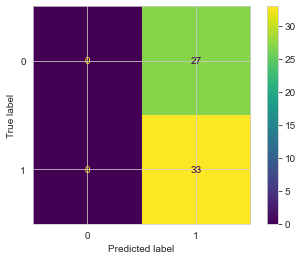

In [51]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y1_test,y1_pred)

In [52]:
## Now, Let's predict for LogisticRegression model for Second target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x2_train,y2_train)
y2_pred = pipe.predict(x2_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


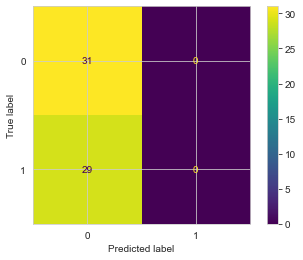

In [53]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y2_test,y2_pred)

In [54]:
## Now, Let's predict for LogisticRegression model for third target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x3_train,y3_train)
y3_pred = pipe.predict(x3_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


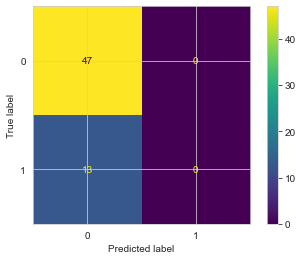

In [55]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y3_test,y3_pred)

In [56]:
## Now, Let's predict for LogisticRegression model for Fourth target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x4_train,y4_train)
y4_pred = pipe.predict(x4_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


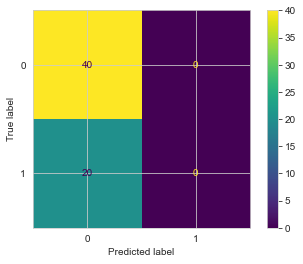

In [57]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y4_test,y4_pred)

In [58]:
## Now, Let's predict for LogisticRegression model for Fifth target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x5_train,y5_train)
y5_pred = pipe.predict(x5_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


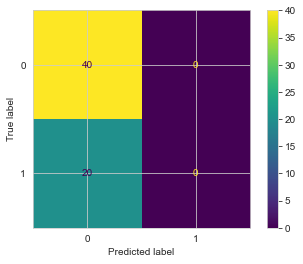

In [59]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y5_test,y5_pred)

In [60]:
## Now, Let's predict for LogisticRegression model for Fifth target values.
model = LogisticRegression()
pipe = Pipeline([('pca', PCA(n_components = 2)), ('MinMaxScaler', MinMaxScaler()), ('LogisticRegression',model)], verbose = True)
pipe.fit(x6_train,y6_train)
y6_pred = pipe.predict(x6_test)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing MinMaxScaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing LogisticRegression, total=   0.0s


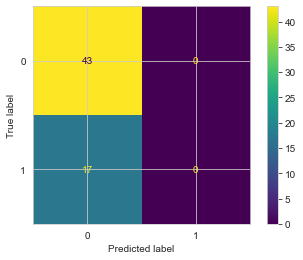

In [61]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y6_test,y6_pred)

# Conclusion

######  After Building Pipeline and using Logistic Regression Model we can say that from confusion matrix of every 6 category that our recommendation system have a moderate accuracy rate. It can be increased if we have large datasets. But In small datasets generally overfitting takes place.